2962/2962 [==============================] - 27s 8ms/step - loss: 4.4625e-04
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 64)                16896     
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


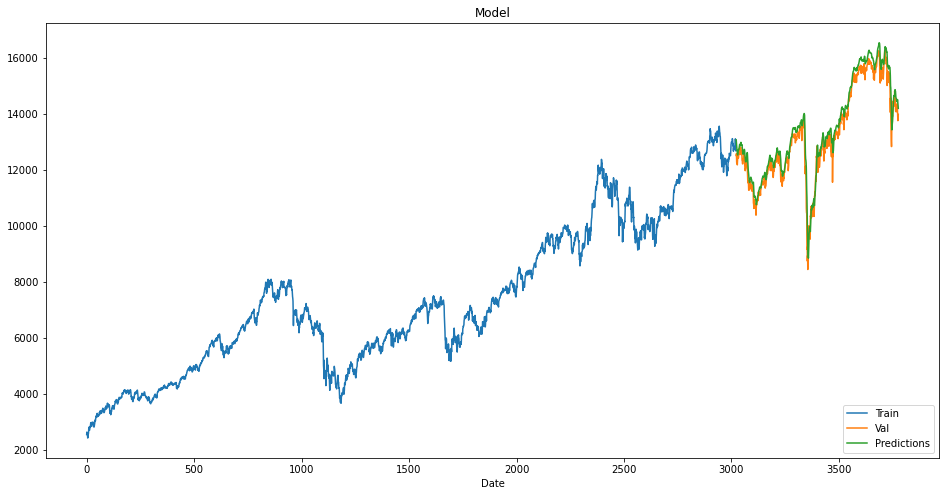

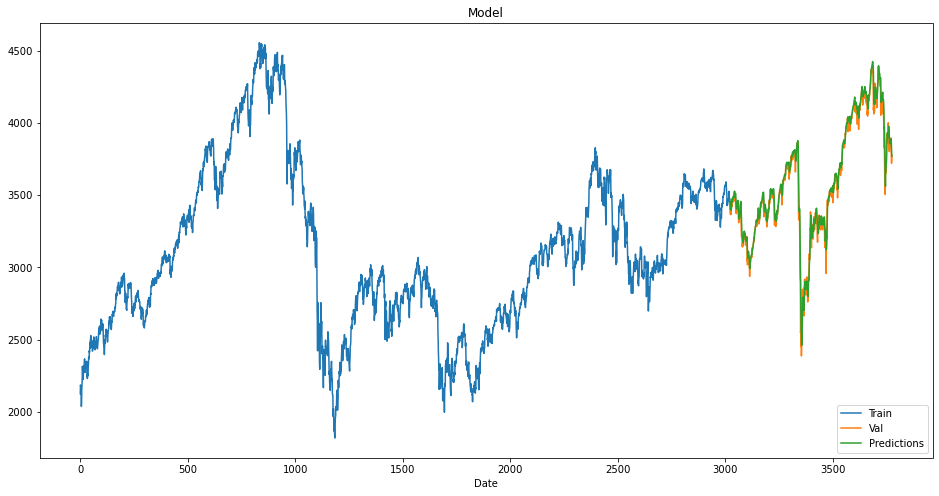

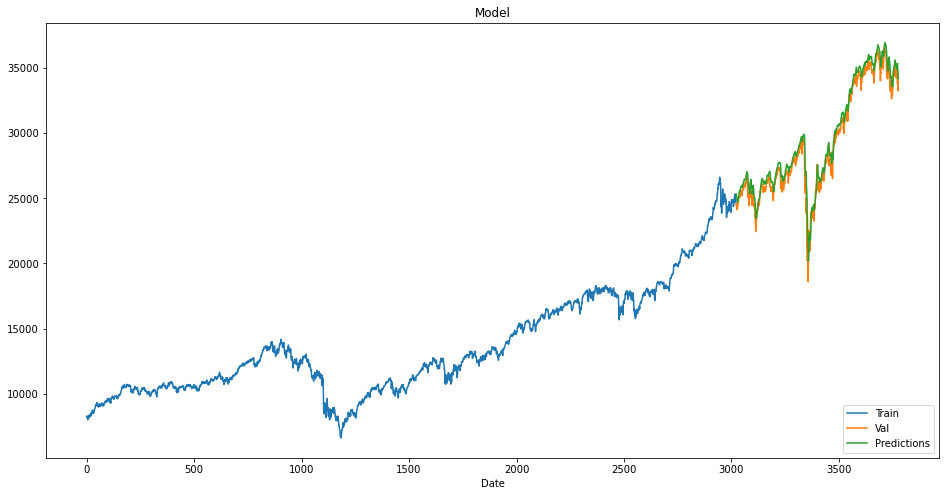

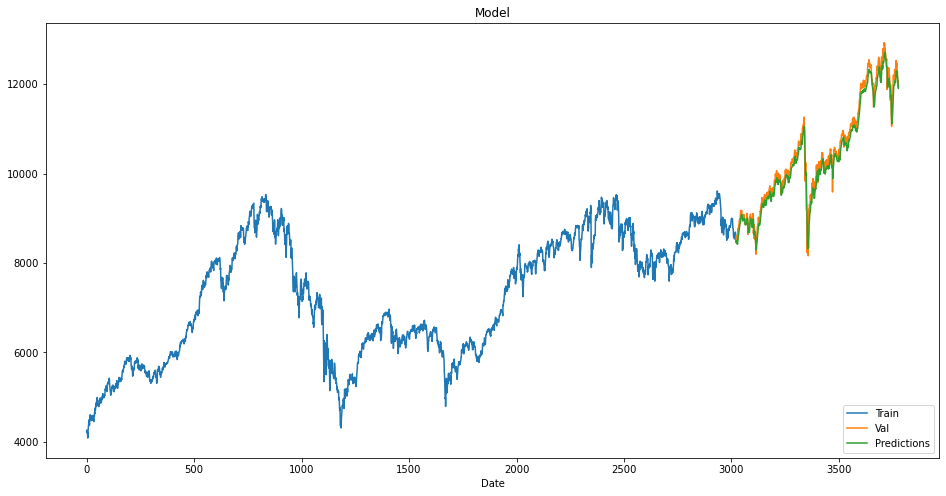

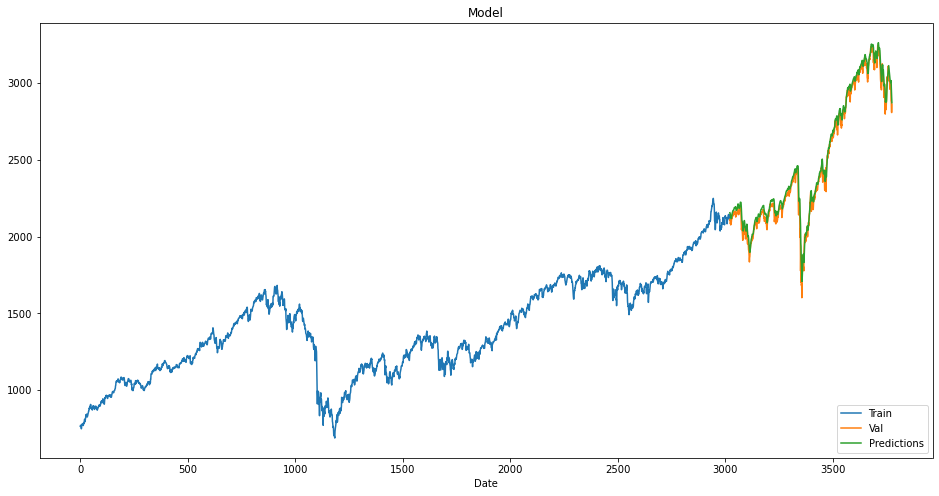

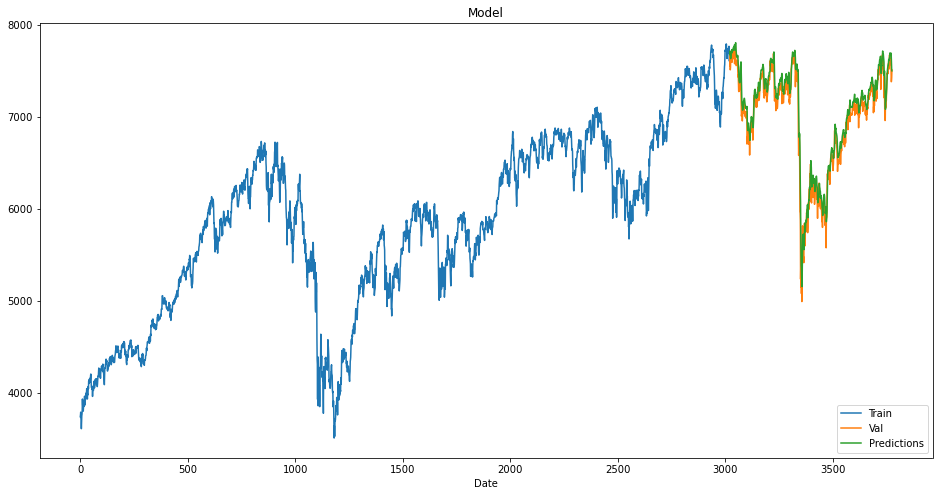

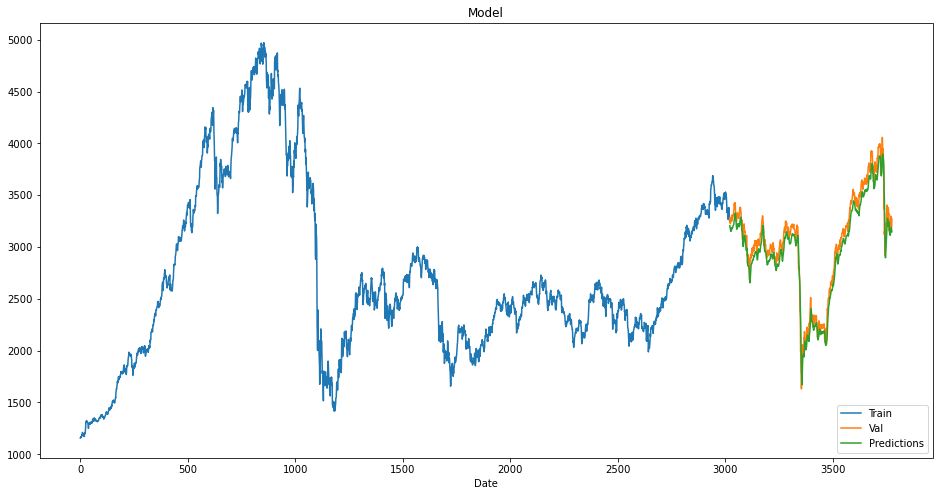

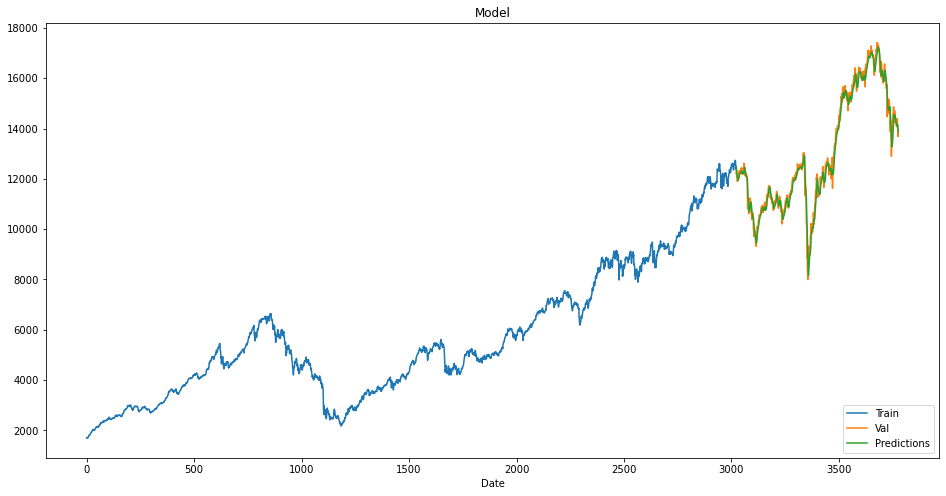

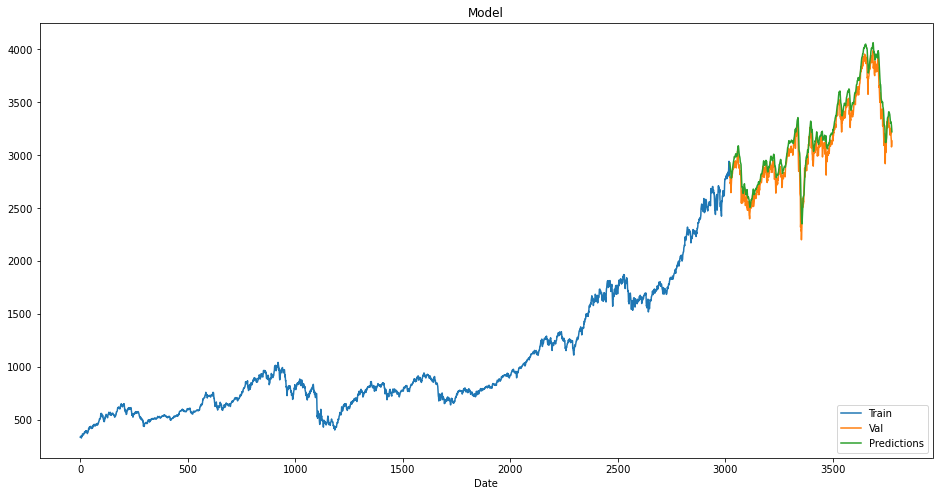

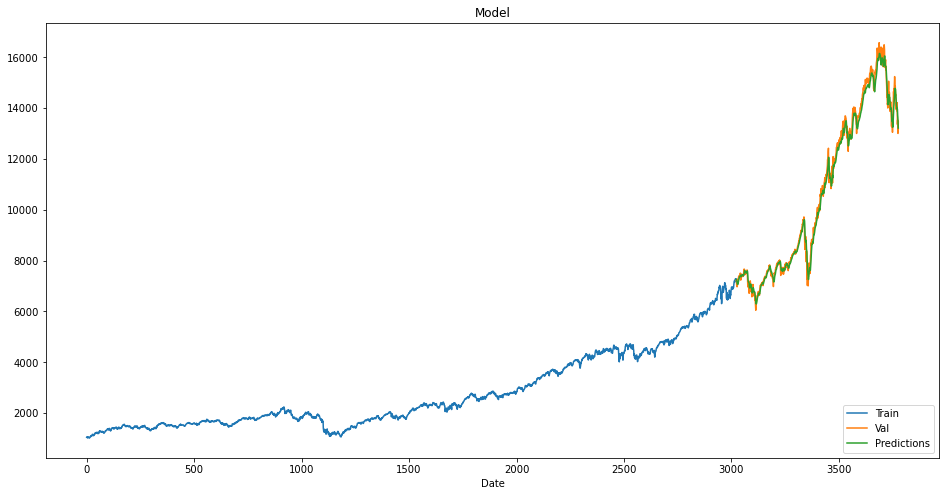

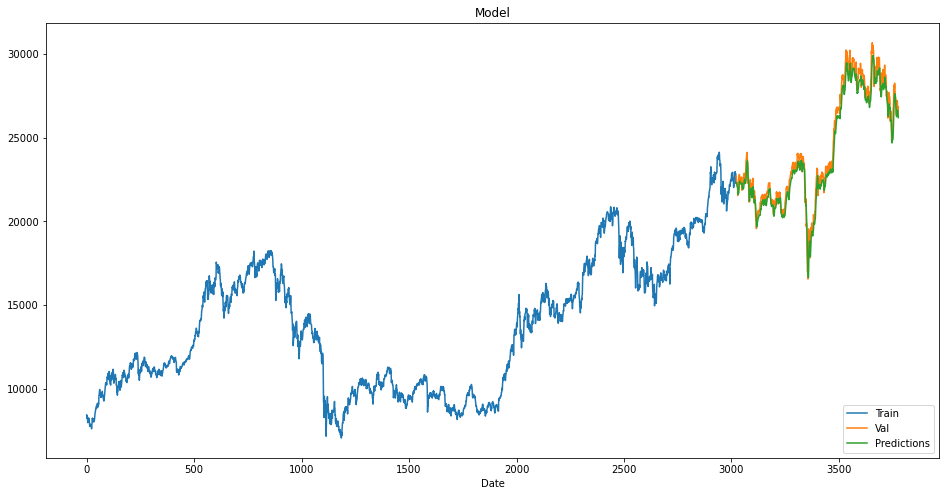

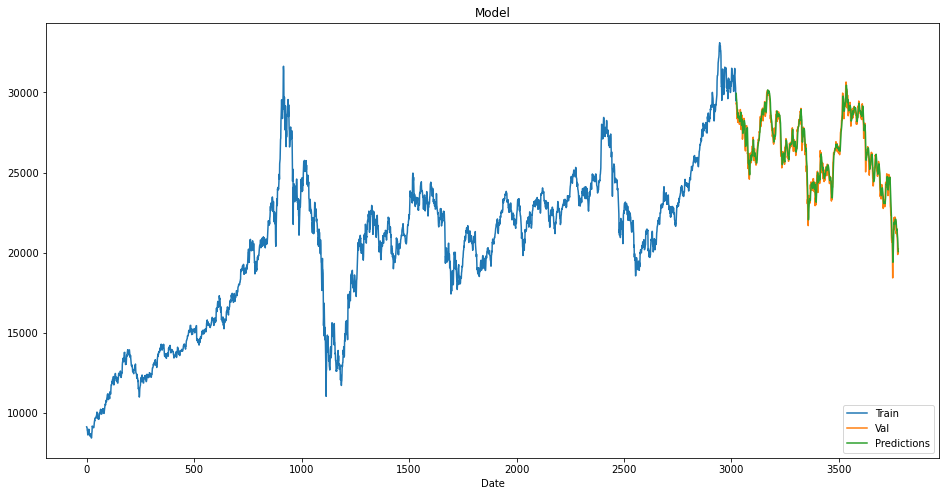

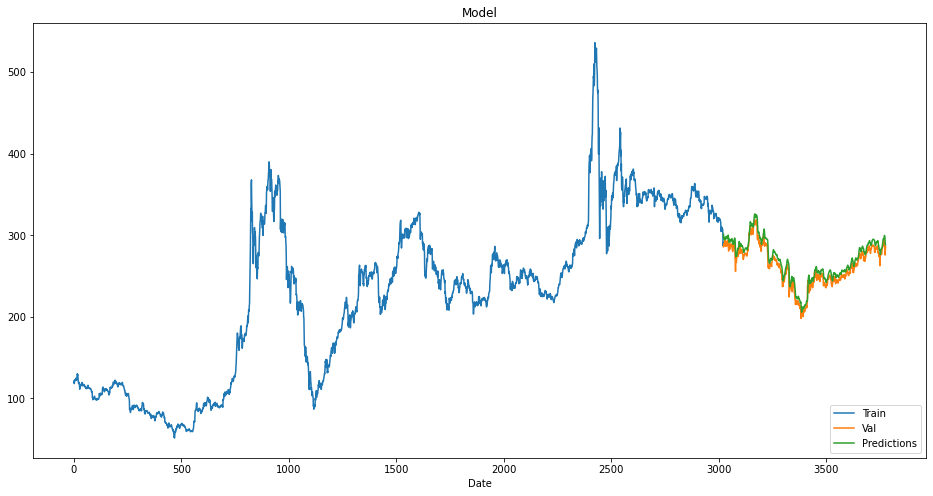

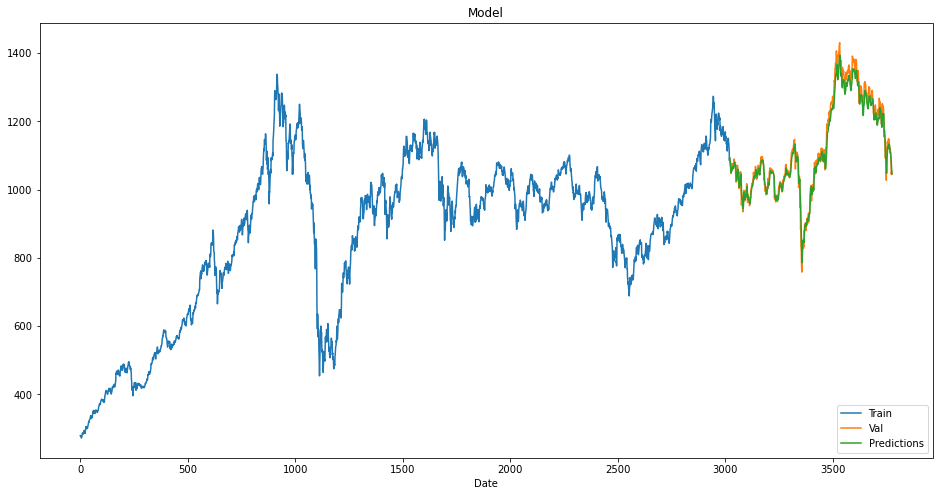

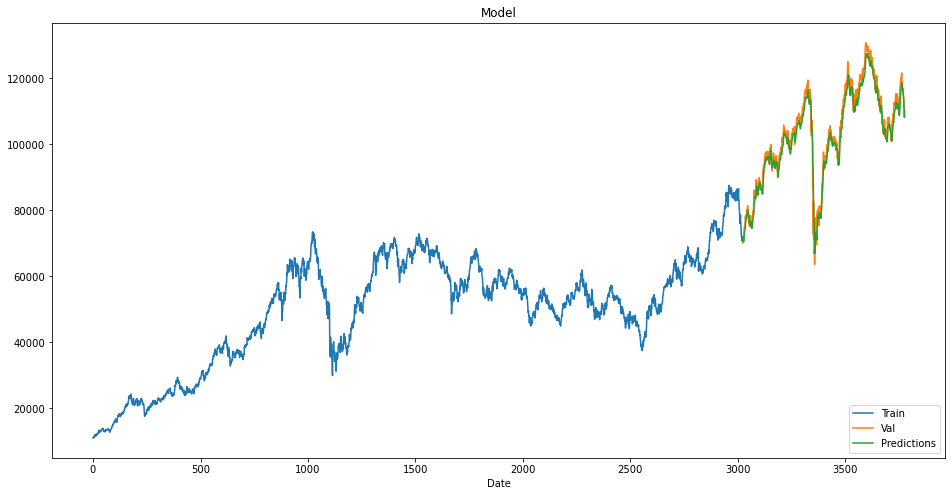

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.express as px
import os
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import csv
import warnings
warnings.filterwarnings("ignore")

os.chdir('C:/Users/Sven Konermann/Documents/GitHub/DataScience/Data')

IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
acc_score1=[]
score1=[]

#Dataframe öffnen
df = pd.read_csv('Indizes.csv')
df = df.drop(df.columns[0],axis=1)

#Datum in das richtige Datenformat konvertieren
df['Datum'] = pd.to_datetime(df.Datum)

#Scraping Loop
x=0
while x < len(IndexListe):
    
#Data Normalization

    data = df.filter(['Schluss ' +IndexListe[x]])
    dataset = data.values
    training_data_len = math.ceil(len(dataset) * .8)
    training_data_len
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

# Daten in Trainingsdaten splitten     
    train_data = scaled_data[0:training_data_len ,:]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    
#Model

    model = Sequential()
    model.add(LSTM(64, return_sequences=False, input_shape=(x_train.shape[1],1)))
    model.add(Dense(32))
    model.add(Dense(1))
        
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Prediction 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
    
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

#Ergebnisse visualisieren     
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.plot(train['Schluss '+IndexListe[x]])
    plt.plot(valid[['Schluss '+IndexListe[x], 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show
    
    plt.savefig(IndexListe[x]+'.png')
    
    valid.to_csv(IndexListe[x]+'_valid.csv')

#Metriken berechnen & in File schreiben
    score=(sum(abs(valid['Schluss '+IndexListe[x]]-valid['Predictions'])/valid['Schluss '+IndexListe[x]])/len(valid['Schluss '+IndexListe[x]]))*100
    score1.append(score)
        
    acc_score=(1-sum(abs(valid['Schluss '+IndexListe[x]]-valid['Predictions'])/valid['Schluss '+IndexListe[x]])/len(valid['Schluss '+IndexListe[x]]))*100
    acc_score1.append(acc_score)
    x+=1

model.summary()
with open('score.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(score1)  
        
with open('accscore.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(acc_score1) 

2962/2962 [==============================] - 51s 16ms/step - loss: 5.7028e-04
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_65 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_80 (Dense)            (None, 25)                1275      
                                                                 
 dense_81 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


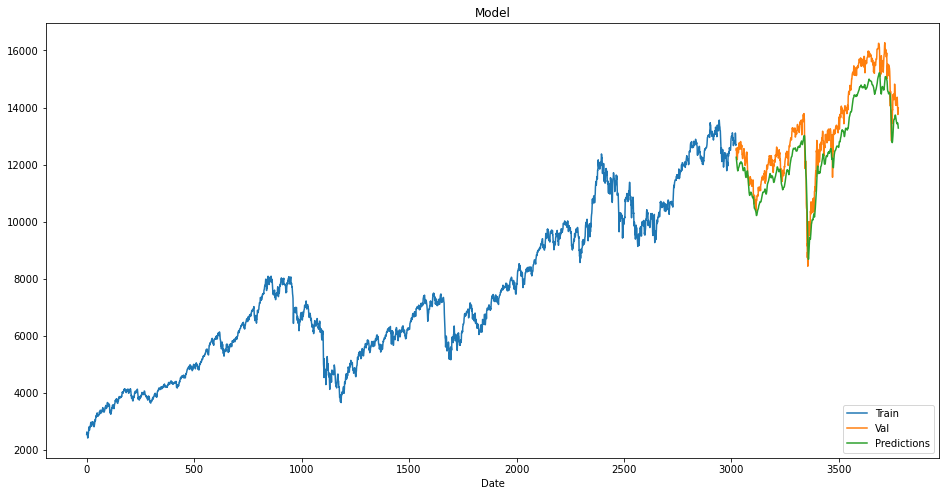

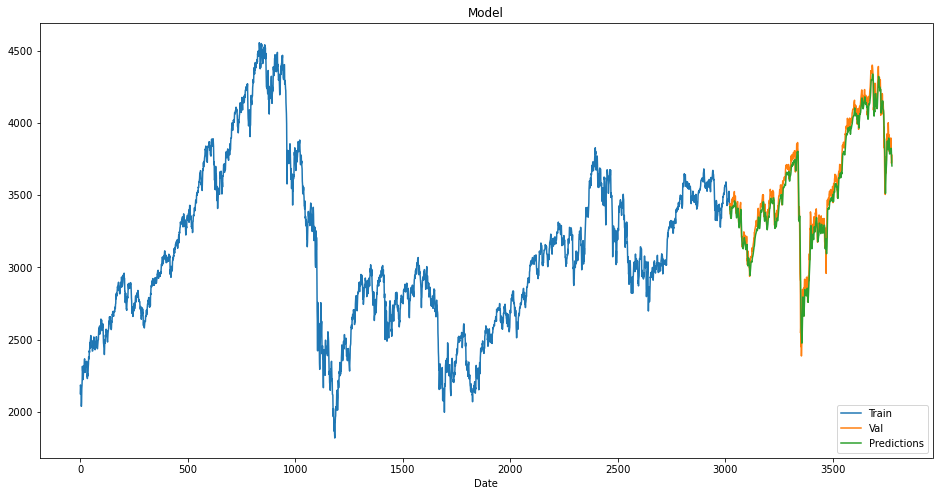

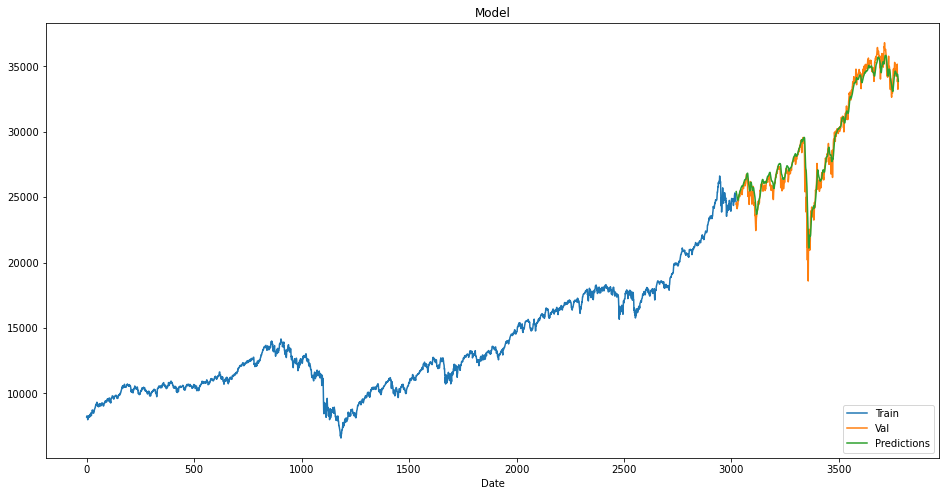

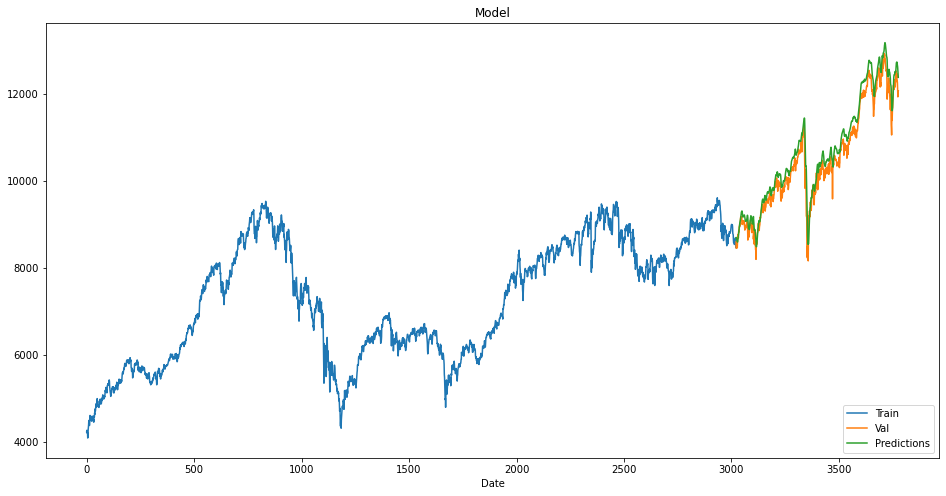

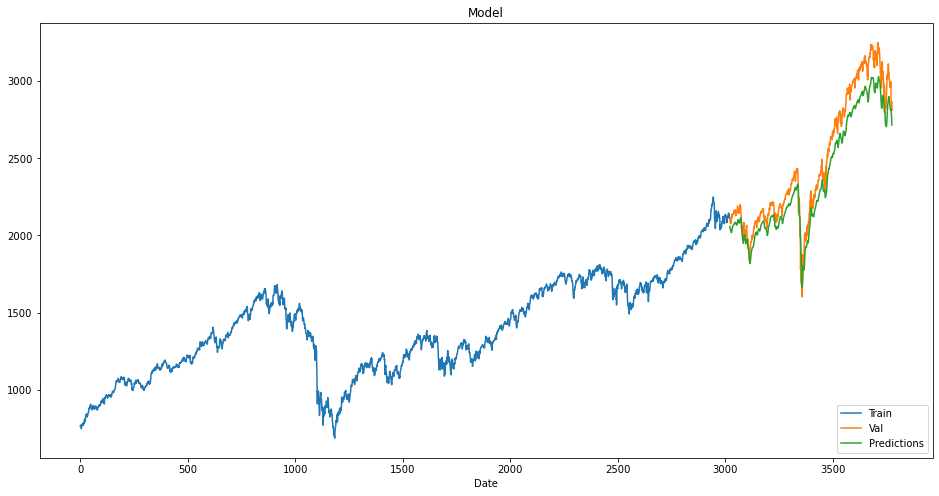

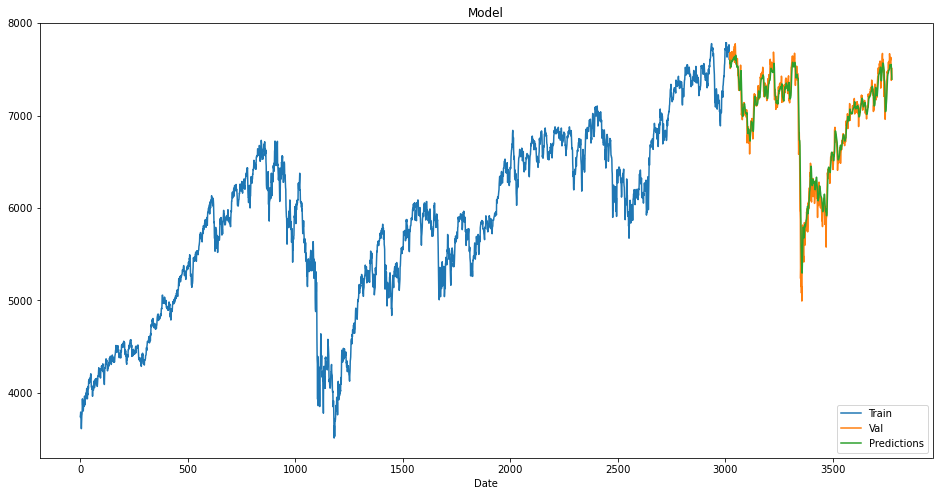

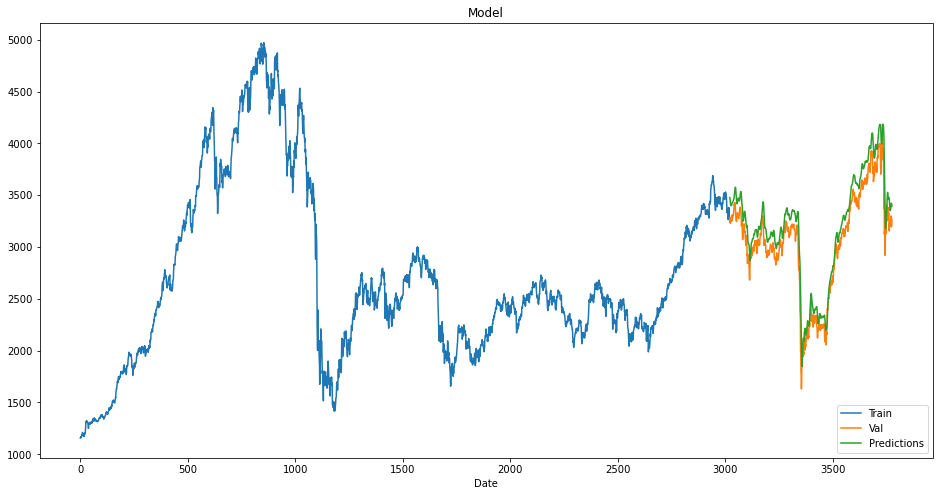

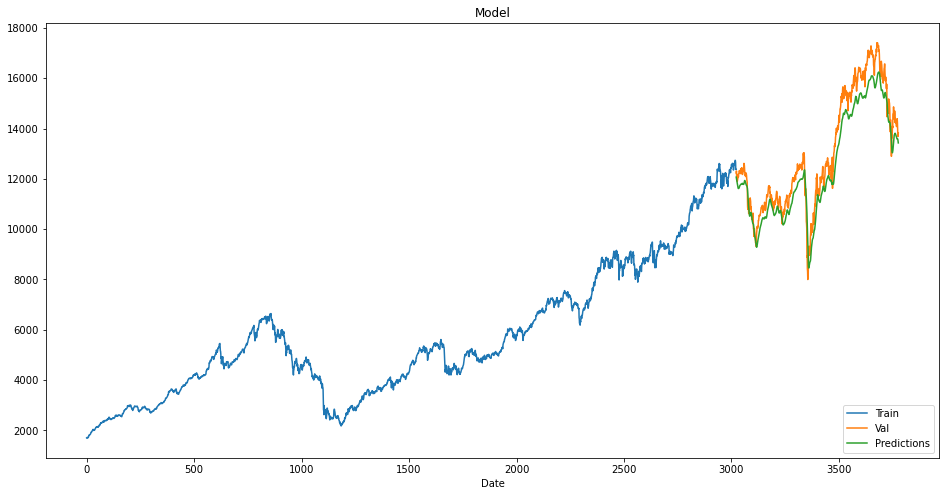

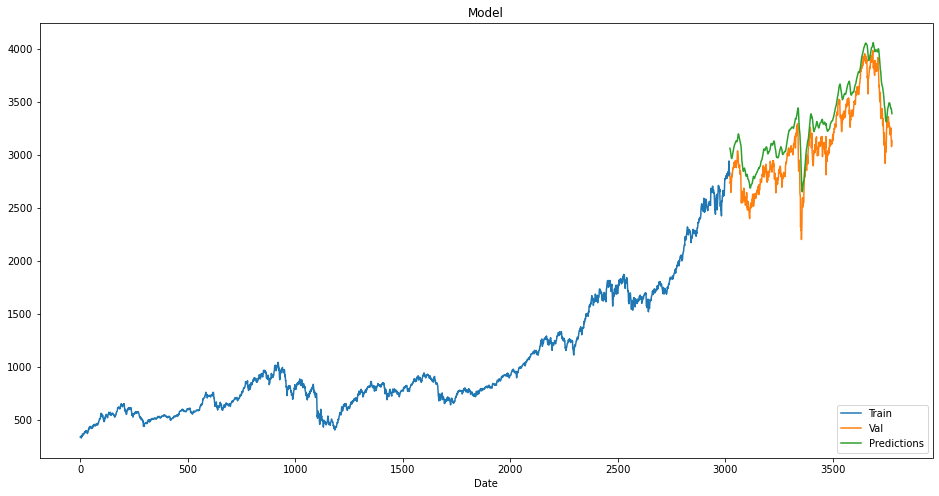

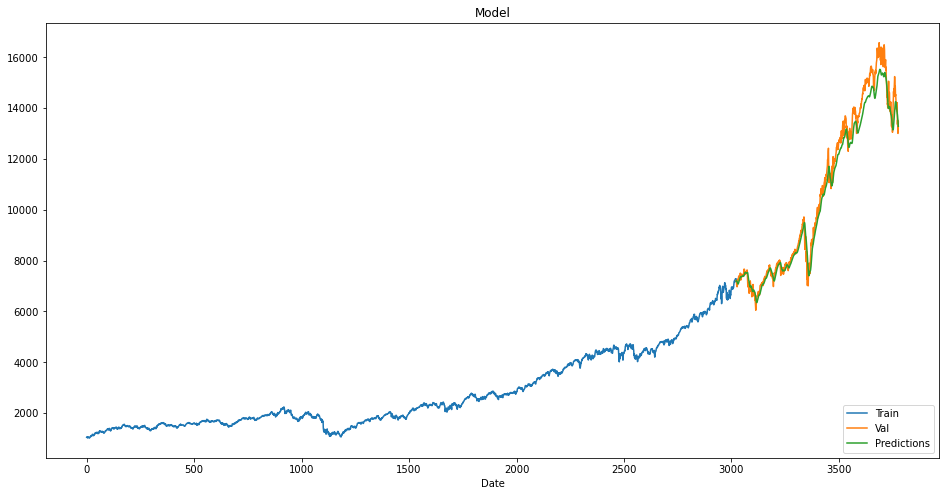

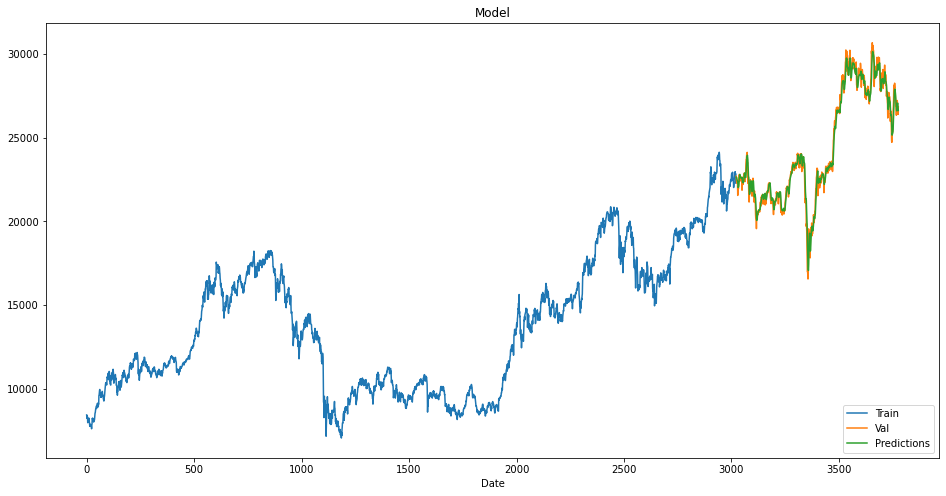

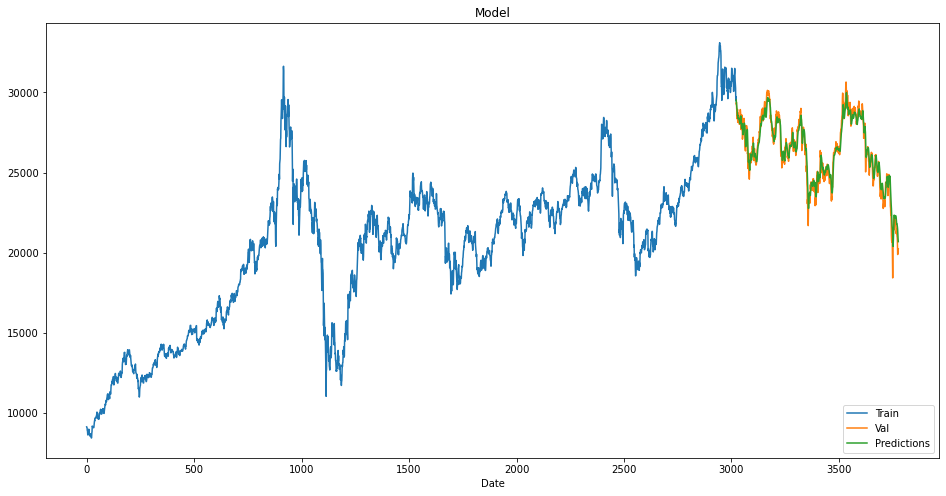

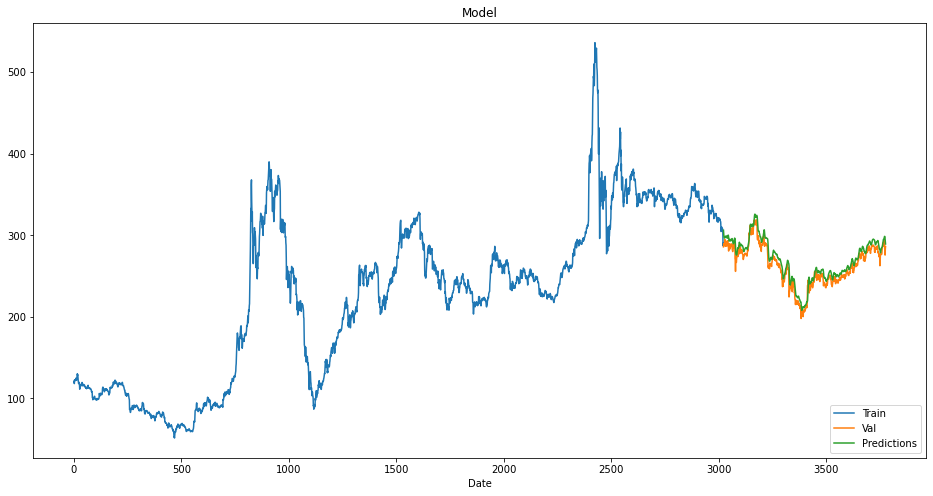

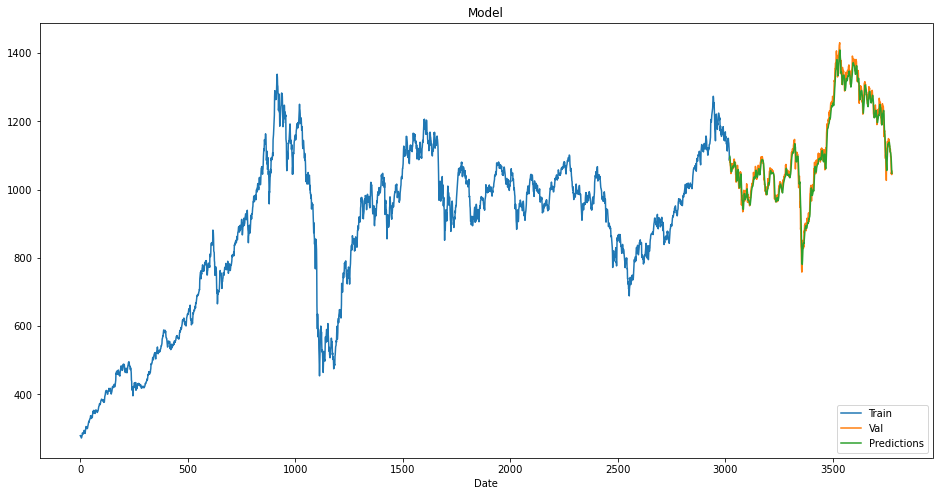

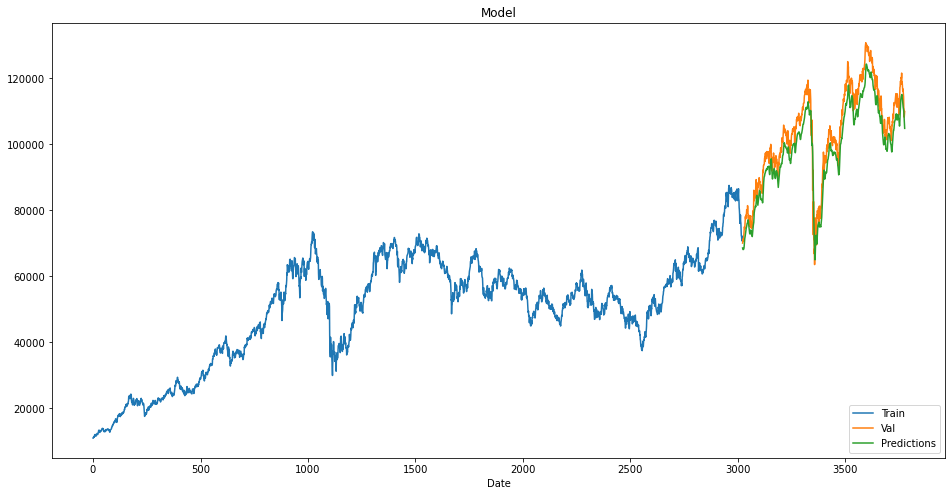

In [4]:
acc_score2=[]
score2=[]

#Dataframe öffnen
df = pd.read_csv('Indizes.csv')
df = df.drop(df.columns[0],axis=1)

#Datum in das richtige Datenformat konvertieren
df['Datum'] = pd.to_datetime(df.Datum)

#Scraping Loop
x=0
while x < len(IndexListe):
    
#Data Normalization
    data = df.filter(['Schluss '+IndexListe[x]])
    dataset = data.values
    training_data_len = math.ceil(len(dataset) * .8)
    training_data_len
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

# Daten in Trainingsdaten splitten 
    train_data = scaled_data[0:training_data_len ,:]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    
#Model

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model.fit(x_train, y_train, batch_size=1, epochs=1)

#Prediction    
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
    
    train = data[:training_data_len]
    valid = data[training_data_len:]

#Ergebnisse visualisieren 
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.plot(train['Schluss '+IndexListe[x]])
    plt.plot(valid[['Schluss '+IndexListe[x], 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show

#Ergebnisse speichern    
    plt.savefig(IndexListe[x]+'2.png')
    valid.to_csv(IndexListe[x]+'_valid2.csv')

#Metriken berechnen & in File schreiben
    score=(sum(abs(valid['Schluss '+IndexListe[x]]-valid['Predictions'])/valid['Schluss '+IndexListe[x]])/len(valid['Schluss '+IndexListe[x]]))*100
    score2.append(score)
        
    acc_score=(1-sum(abs(valid['Schluss '+IndexListe[x]]-valid['Predictions'])/valid['Schluss '+IndexListe[x]])/len(valid['Schluss '+IndexListe[x]]))*100
    acc_score2.append(acc_score)
    x+=1

model.summary()
with open('score.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(score2)  
        
with open('accscore.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(acc_score2) 

In [5]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Ausgeben von Metriken für den Indize "Bovespa"
EVS = (explained_variance_score(valid['Schluss Bovespa'], valid['Predictions']))
ME = (max_error(valid['Schluss Bovespa'], valid['Predictions']))
MAE = (mean_absolute_error(valid['Schluss Bovespa'], valid['Predictions']))
MSE = np.sqrt(mean_squared_error(valid['Schluss Bovespa'], valid['Predictions'], squared=True))
RMSE = np.sqrt(mean_squared_error(valid['Schluss Bovespa'], valid['Predictions'], squared=False))
R2 = r2_score(valid['Schluss Bovespa'], valid['Predictions'])
print('Model: Bovespa | EVS: ', EVS)
print('Model: Bovespa | ME: ', ME)
print('Model: Bovespa | MAE: ', MAE)
print('Model: Bovespa | MSE ', MSE)
print('Model: Bovespa | RMSE ', RMSE)
print('Model: Bovespa | R2 ', R2)
print('Model: Bovespa | Genauigkeit', acc_score)
print('Model: Bovespa | Score', score)
print('----------------')

Model: Bovespa | EVS:  0.9738782237991616
Model: Bovespa | ME:  14170.063750000001
Model: Bovespa | MAE:  4734.340817425496
Model: Bovespa | MSE  5107.69862897117
Model: Bovespa | RMSE  71.4681651434481
Model: Bovespa | R2  0.8732208004594681
Model: Bovespa | Genauigkeit 95.4097959110952
Model: Bovespa | Score 4.590204088904804
----------------


In [6]:
# Durchschnittliche Genauigkeit Model vor Tuning + Einzelwerte
print('Genauigkeit von durchschnittlich '+str(sum(acc_score1)/len(acc_score1))+' Prozent')
print('Siehe Einzelwerte ' + str(acc_score1))

Genauigkeit von durchschnittlich 98.08089305381782 Prozent
Siehe Einzelwerte [97.75332930516191, 98.80341529240151, 98.13862082205775, 98.52208579309331, 98.52609999962941, 98.58797788867358, 96.88393854554191, 98.23777283363754, 97.07815678884046, 98.26342664715892, 98.03524998150236, 98.61242796594269, 97.31926990647273, 98.49455061733693, 97.95707341981627]


In [7]:
# Durchschnittliche Genauigkeit Model nach Tuning + Einzelwerte
print('Genauigkeit von durchschnittlich '+str(sum(acc_score2)/len(acc_score2))+' Prozent')
print('Siehe Einzelwerte ' + str(acc_score2))

Genauigkeit von durchschnittlich 96.8115781314666 Prozent
Siehe Einzelwerte [94.90338756088599, 98.25921380717122, 98.33167451002376, 97.83369560034414, 95.53598478970676, 98.78885103654433, 95.18996621803043, 95.1489708728638, 93.20002614599652, 96.93938046573847, 98.61911517357996, 98.37876903812979, 97.14932359849438, 98.48551724339414, 95.4097959110952]
